In [3]:
#import sys; sys.path.append("..")
from epi_model import *

ModuleNotFoundError: No module named 'pandas'

# Mastrandrea just Monday

In [2]:
net = temporalNetwork.load('high school')

In [3]:
net2 = net.range( 1, 2 )

In [4]:
net2.days

[datetime.date(2013, 12, 3)]

In [5]:
net2.day_breaks

[-1260, 3060]

In [6]:
mat = nx.adjacency_matrix(net2.G)
mat = mat.todense()
mat = np.array(mat)

In [7]:
deg = np.sum(mat>0, axis=0)
deg_gt_med = np.sum(mat>np.median(mat[mat>0]), axis=0)
deg_weighted = np.sum(mat, axis=0)

m2 = np.matmul(mat,mat)
m3 = np.matmul(m2,mat)

deg2 = np.sum(np.matmul(mat>0,mat>0), axis=0)
deg2_weighted = np.sum(m2, axis=0)

In [8]:
any(x%2!=0 for x in mat.flatten())

True

In [9]:
nppl = net2.Nnodes
ndays = 5
mindeg = deg.min()
maxdeg = deg.max()
avgdeg = deg.mean()

longest = mat.max() * 20 / 3600
meant = mat[mat>0].mean() * 20 / 3600

In [10]:
mean_day = mat.sum(axis=0).mean() *20 / (3600)

In [11]:
max_day = mat.sum(axis=0).max() *20 / (3600)
min_day = mat.sum(axis=0).min() *20 / (3600)

In [12]:
len(net2.G.nodes)

310

In [13]:
display(Markdown(f"""
The network recorded proximity throughout the school day for {len(net.G.nodes):,} French highschool students over the course of {ndays:} days.
Although the network was collected over the course of {ndays:} days, some students were not present or participating on multiple of the 5 days.
To diminish the effects of missing data, as well as the shortened collection period of the first day, I consider only the interaction profile for Tuesday, 
    assuming these interactions continue continuously through the period of the simulation.
On Tuesday, students saw an average of {avgdeg:0.1f} contacts for at least 20 seconds. 
The most was {maxdeg:,} contacts, and the least only {mindeg:,}.
The pair who interacted most were together for a full {longest:0.2f} hours that day, but the mean accumulated contact time was only {meant*60:0.2f} minutes.
Students spent {mean_day:0.2f} hours on average facing another person in this way. 
The most interacted for {max_day:0.2f} hours on Tuesday, the least for {min_day*3600:0.0f} seconds total.
"""))


The network recorded proximity throughout the school day for 327 French highschool students over the course of 5 days.
Although the network was collected over the course of 5 days, some students were not present or participating on multiple of the 5 days.
To diminish the effects of missing data, as well as the shortened collection period of the first day, I consider only the interaction profile for Tuesday, 
    assuming these interactions continue continuously through the period of the simulation.
On Tuesday, students saw an average of 16.6 contacts for at least 20 seconds. 
The most was 43 contacts, and the least only 1.
The pair who interacted most were together for a full 3.94 hours that day, but the mean accumulated contact time was only 6.13 minutes.
Students spent 1.70 hours on average facing another person in this way. 
The most interacted for 8.11 hours on Tuesday, the least for 60 seconds total.


## Manstrea difference between days

In [14]:
gs = [
    net.range( i, i+1 ).G
    for i in range(len(net.days))
]

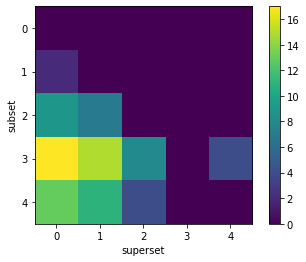

In [15]:
plt.imshow([[
    len(set(gs[i].nodes).difference(gs[j].nodes))
    for i in range(len(net.days))
] for j in range(len(net.days))])

plt.xlabel('superset');
plt.ylabel('subset');

plt.colorbar();

In [16]:
dsets = {}
for d in range(len(net.day_breaks)-1):
    filt = (
        ( net.day_breaks[d] <= net.eldf[0] ) &
        ( net.eldf[0] <= net.day_breaks[d+1] )
    )
    
    dsets[d] = set( net.eldf[ filt ][1] )

In [17]:
from itertools import chain
c1 = Counter(chain.from_iterable(
    dsets.values()
))
c2 = Counter(c1.values())

In [18]:
rest = sum(c2.values()) - c2[5]-c2[4]

In [19]:
biggest_day = max(dsets, key=lambda x:len(dsets[x]))
days = [
    'Monday',
    'Tuesday','Wednesday','Thursday','Friday'
]
bds = days[biggest_day]
bdn = len(dsets[biggest_day])

In [20]:
display(Markdown("""
{c2[5]:,} students were present for all 5 days of data collection,
{c2[4]:,} missed one day,
and {rest:,} students missed more than one day.
The most students were present on {bds}: {bdn} students.
""".format(**locals())))


250 students were present for all 5 days of data collection,
51 missed one day,
and 26 students missed more than one day.
The most students were present on Monday: 312 students.


# Salathe

In [21]:
net2 = temporalNetwork.load('high school2')

In [23]:
mat = nx.adjacency_matrix(net2.G)
mat = mat.todense()
mat = np.array(mat)

In [24]:
deg = np.sum(mat>0, axis=0)
deg_gt_med = np.sum(mat>np.median(mat[mat>0]), axis=0)
deg_weighted = np.sum(mat, axis=0)

m2 = np.matmul(mat,mat)
m3 = np.matmul(m2,mat)

deg2 = np.sum(np.matmul(mat>0,mat>0), axis=0)
deg2_weighted = np.sum(m2, axis=0)

In [25]:
nppl = net2.Nnodes
ndays = 5
mindeg = deg.min()
maxdeg = deg.max()
avgdeg = deg.mean()

longest = mat.max() * 20 / 3600
meant = mat.mean() * 20 / 3600

In [26]:
mean_day = mat.sum(axis=0).mean() *20 / (5*3600)

In [28]:
max_day = mat.sum(axis=0).max() *20 / (5*3600)
min_day = mat.sum(axis=0).min() *20 / (3600)

In [31]:
"""
From them:
The dataset covers CPIs of 94% of the entire school population,
representing 655 students, 73 teachers, 55 staff, and 5 other
persons, and it contains 2,148,991 unique close proximity records
(CPRs). A CPR represents one close (maximum of 3 m) proximity detection event between two motes. An interaction is defined as a continuous sequence (≥1) of CPRs between the same
two motes, and a contact is the sum of all interactions between
these two motes. 
""";

In [32]:
n_type = Counter(net2.node_attr['role'].values())

In [33]:
n_type

Counter({'student': 656, 'staff': 56, 'teacher': 73, 'other': 5})

In [42]:
display(Markdown(f"""
The network was collected in a single day, recording proximity throughout the school day 
    for {n_type['student']} students, {n_type['staff']} staff, {n_type['teacher']} teachers, and {n_type['other']} others
    ({net2.Nnodes} total participants).
Students saw an average of {avgdeg:0.1f} contacts for at least 20 seconds. The most was {maxdeg:,} contacts, and the least only {mindeg:,}.
The pair who interacted most were together for a full {longest:0.2f} hours that day, but the mean accumulated contact time between any interacting pair was only {meant*60:0.2f} minutes.
Students spent {mean_day:0.2f} hours per day on average facing another person in this way. The most social individual was copresent for {max_day:0.2f} hours that day, and the least for just {min_day*3600:0.0f} seconds.
"""))


The network was collected in a single day, recording proximity throughout the school day 
    for 656 students, 56 staff, 73 teachers, and 5 others
    (784 total participants).
Students saw an average of 96.9 contacts for at least 20 seconds. The most was 248 contacts, and the least only 1.
The pair who interacted most were together for a full 2.79 hours that day, but the mean accumulated contact time between any interacting pair was only 0.87 minutes.
Students spent 2.27 hours per day on average facing another person in this way. The most social individual was copresent for 6.48 hours that day, and the least for just 20 seconds.
